**Here is a short documentation on data storytelling part of my capstone project "*IBM HR Analytics Employee Attrition & Performance*".**

As of now, I came up with few interesting questions while doing analysis on my dataset. Before moving to those interesting questions,I just want to list the columns that my dataset contains. It consists of 35 columns/features which includes Age, Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction, Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked, Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears, TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager. 

So, these are few list of questions that struct into my mind while seeing the dataset such as:

### Which age-group people contribute maximum attrition?

Populating the interactive namespace from numpy and matplotlib


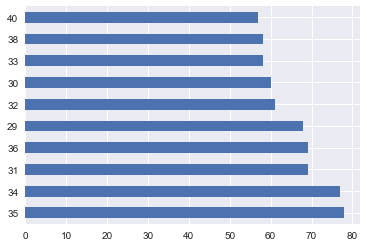

In [27]:
%pylab inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import csv

#Importing and reading CSV file
file_input = 'C:\\Users\\Sneha Rani\\CapstoneProject-LR\\ibm-hr-attrition.csv'
df1 = pd.read_csv(file_input, index_col=None)

# 10 most popular age people working in company
df1['Age'].value_counts()[:10].plot(kind='barh')

In [28]:
# Finding the average age of the people working in company
df1['Age'].describe()

count    1470.000000
mean       36.923810
std         9.135373
min        18.000000
25%        30.000000
50%        36.000000
75%        43.000000
max        60.000000
Name: Age, dtype: float64

*I first started my analysis by surveying "Age" feature of my dataset.I explored ten most working-age people in the company by using value_counts().I also plotted bar graph and found that people of Age 34 and 35 are topmost ages employed. Also, the mean age of the people is 37 which is quite close to the top age working employees in the company.This means most of the people belong to mid-age adults and it can be one of the factors for higher attrition.*

          Young_adults Mid_age_adults Mid_to_old_adults Old_adults
                 count          count             count      count
Attrition                                                         
No                  59            761               355         58
Yes                 38            147                41         11


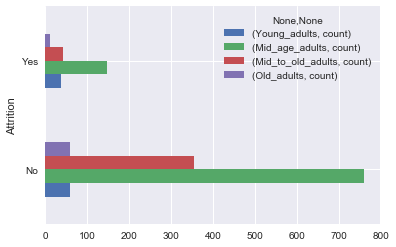

In [29]:
g1 = df1[(df1.Age >=15) & (df1.Age <=24)].groupby('Attrition').agg({'Age': ['count']})
d1 = g1.rename(columns={"Age": "Young_adults"})
g2 = df1[(df1.Age >=25) & (df1.Age <=40)].groupby('Attrition').agg({'Age': ['count']})
d2 = g2.rename(columns={"Age": "Mid_age_adults"})
g3 = df1[(df1.Age >=41) & (df1.Age <=54)].groupby('Attrition').agg({'Age': ['count']})
d3 = g3.rename(columns={"Age": "Mid_to_old_adults"})
g4 = df1[(df1.Age >=55) & (df1.Age <=64)].groupby('Attrition').agg({'Age': ['count']})
d4 = g4.rename(columns={"Age": "Old_adults"})
frames = [d1, d2, d3, d4]
res = pd.concat(frames, axis=1)
res.plot(kind='barh')
print(res)

*So, I further deep dived into that and divided age into four groups: (Age 15-24):-Young_adults (Age 25-40):-Mid_age_adults (Age 41-54):-Mid_to_old_adults (Age 55-64):-Old_adults Also counted the number of Attrition('No'/'Yes') for each group and plotted bar graph. From the graph, I found that count of Mid_age_adults are more and they are the highest contributor to Attrition and Old_adults group of people have least attrition rate.*

### What is the count of married people and unmarried people attrition rate? Are married people more prone to attrition?

          Divorced Married Single
             count   count  count
Attrition                        
No             294     589    350
Yes             33      84    120


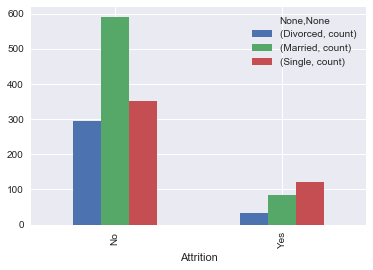

In [30]:
g1 = df1[(df1.MaritalStatus =='Divorced')].groupby('Attrition').agg({'MaritalStatus': ['count']})
d1 = g1.rename(columns={"MaritalStatus": "Divorced"})
g2 = df1[(df1.MaritalStatus =='Married')].groupby('Attrition').agg({'MaritalStatus': ['count']})
d2 = g2.rename(columns={"MaritalStatus": "Married"})
g3 = df1[(df1.MaritalStatus =='Single')].groupby('Attrition').agg({'MaritalStatus': ['count']})
d3 = g3.rename(columns={"MaritalStatus": "Single"})
frames = [d1, d2, d3]
res = pd.concat(frames, axis=1)
res.plot(kind='bar')
print(res)

*Coming to second question survey, we found that based on MaritalStatus, people who are 'Single' are more prone to attrition than people who are married or divorced which is another interesting fact.*

### What is the count of people working OverTime and YearsInCurrentRole? How working overtime (or not), and the years in role relate to employee attrition?

In [31]:
# count of employee leaving the company group by same years in current role
df1[(df1.Attrition =='Yes')].groupby('YearsInCurrentRole').agg({'Attrition': ['count']})

,Attrition
,count
YearsInCurrentRole,
0,73
1,11
2,68
3,16
4,15
5,1
6,2
7,31


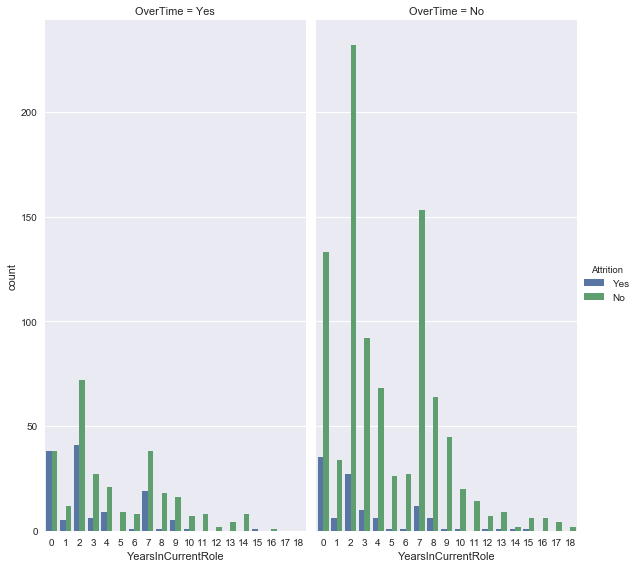

In [32]:
sns.factorplot(x="YearsInCurrentRole", hue="Attrition", col="OverTime", data=df1, kind="count",size=8, aspect=.5)

*First I counted the number of employees who have spent the same number of years in their current role.I analyzed that maximum number of employees leaving the company has spent less than a year, between 2-3yrs or 7-8yrs in the company. I further included overtime feature in the above analysis to see if people who are working overtime and spending the same number of years in the company are leaving the company more frequently or not.After plotting factor plot graph, I observed that people who worked overtime have left the company most.*

### What is the count of attrition of each department on the basis of RelationshipSatisfaction?Does satisfaction level has any impact on employees leaving these departments?

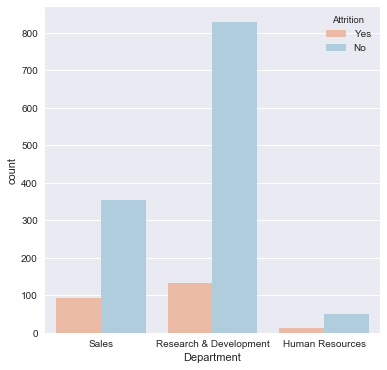

In [33]:
plt.figure(figsize=(6,6))
sns.countplot(x='Department', hue='Attrition', data=df1, palette='RdBu')

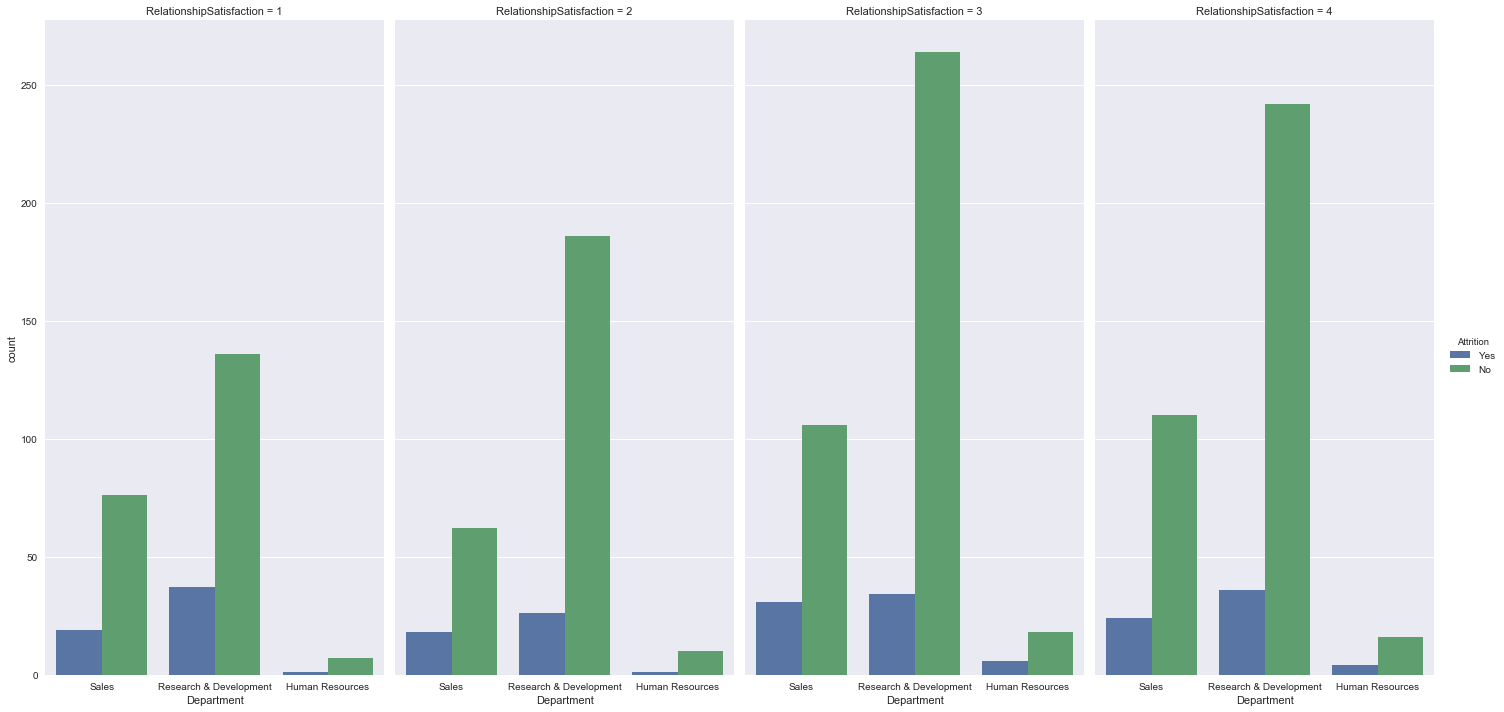

In [34]:
sns.factorplot(x="Department", hue="Attrition", col="RelationshipSatisfaction", data=df1, kind="count",size=10, aspect=.5)

*First I counted attrition on each department by using count plot and observed that research and development field has highest attrition count. Then I added another feature 'RelationshipSatisfaction' to see if the satisfaction level has any impact on employees leaving these departments. After plotting factor plot, I don't see any variance on attrition based on the relationship satisfaction feature. All four different levels (Low, Medium, High, Very High) has the similar number of attrition.*

### Do JobSatisfaction and JobRole impact gradual loss of employees? Are these two features have a common pattern?

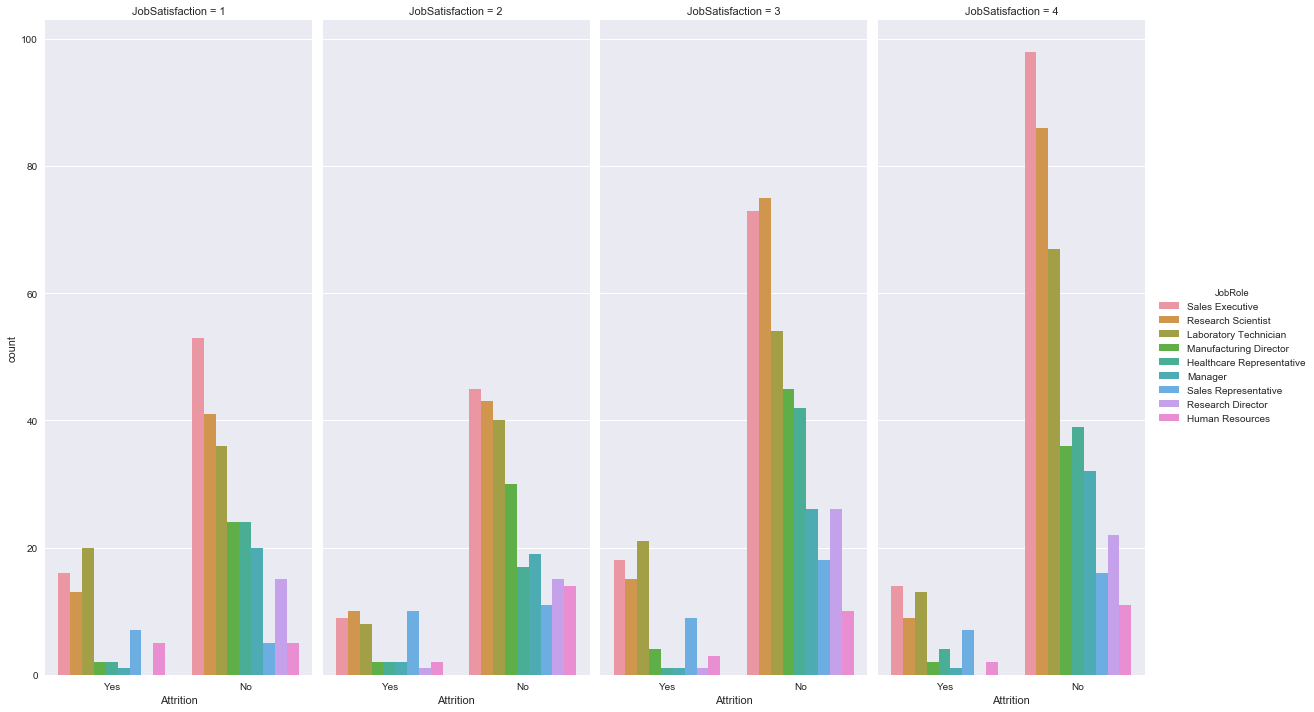

In [35]:
sns.factorplot(x="Attrition", hue="JobRole", col="JobSatisfaction", data=df1, kind="count",size=10, aspect=.4)

*From the plotted graph based on JobRole and JobSatisfaction feature, I see that employees in these roles(Sales Executive, Research Scientist, Laboratory Technician) leave the company most if they have low job satisfaction or high job satisfaction(which is not very high). Sales Representative employees count of attrition are very similar under all job satisfaction levels.*